** Code Objective:** Tests the VarSelection package  
** Description:** Uses the 'adult' data from UCI machine learning repository to test the package  
** Written by:** Rich Downey  
** Last updated:**  9/21/2019

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import LassoCV

# Import the variable selection package
from variable_selection import VarSelection as vs

### Import the dataframe

In [7]:
def import_and_prep_df():
    
    df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
            names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                     'marital_status', 'occupation', 'relationship', 'race', 'sex',
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income'])

    # Create the binary field for the target
    df['income'] = df['income'].str.strip()
    df['target'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)

    # Replace - in string values with an _, replace ? with UNKNOWN
    for column in df.loc[:, df.dtypes == object].columns:
        df.loc[:,column] = df[column].str.replace('-','_')
        df.loc[:,column] = df[column].str.replace('?','UNKNOWN')

    return df

In [8]:
adult_df = import_and_prep_df()

### Setup a variable selection object

In [9]:
var_selection = vs.variable_selection(adult_df, 'target', k_features = 10, random_state = 1)

### Test Squared Correlation

In [10]:
squared_corr = var_selection.squared_corr()
squared_corr

Run time: variable_selection.VarSelection.variable_selection.squared_corr ran in 59 ms


,Variable,Squared_Correlation
1,education_num,0.112328
4,hours_per_week,0.052757
2,capital_gain,0.049876
3,capital_loss,0.022658
0,fnlwgt,0.000090


### Test Random Forest Importance

In [11]:
forest = RandomForestClassifier(n_estimators = 500,
                                random_state = 0,
                                oob_score=True,
                                n_jobs = -1)

rf_importance = var_selection.rf_imp_rank(forest)
rf_importance

Run time: variable_selection.VarSelection.variable_selection.rf_imp_rank ran in 10.31 sec


,features,rf_importance,rf_rank
103,income_>50K,0.417687,1
102,income_<=50K,0.361384,2
27,marital_status_ Married_civ_spouse,0.037083,3
107,capital_gain,0.033104,4
47,relationship_ Husband,0.023428,5
106,education_num,0.021661,6
104,age,0.013485,7
29,marital_status_ Never_married,0.013120,8
109,hours_per_week,0.009585,9
108,capital_loss,0.007142,10


### Absolute Regression Coefficients

In [12]:
lr = linear_model.LogisticRegression(penalty = 'l1', C=0.5)
lm_reg_coeff = var_selection.abs_reg_coeffs(lr)
lm_reg_coeff

Run time: variable_selection.VarSelection.variable_selection.abs_reg_coeffs ran in 0.27 sec


,features,coeff,coeff_abs,coeff_rank
103,age,9.274511,9.274511,1
102,income_>50K,-8.397905,8.397905,2
106,capital_gain,-0.013621,0.013621,3
104,fnlwgt,-0.008366,0.008366,4
108,hours_per_week,0.000354,0.000354,5
107,capital_loss,0.000104,0.000104,6
105,education_num,-0.000002,0.000002,7
73,native_country_ Holand_Netherlands,0.000000,0.000000,8
69,native_country_ Germany,0.000000,0.000000,9
70,native_country_ Greece,0.000000,0.000000,10


### Recurrsive Feature Elimination

Optimal number of features : 8


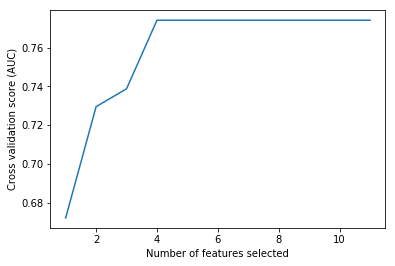

Run time: variable_selection.VarSelection.variable_selection.rfe ran in 4.88 sec


In [13]:
clf = LassoCV(max_iter=2000, tol = 0.1)
rfe_selection = var_selection.rfe(clf, 
                                  2, 
                                  'roc_auc', 
                                  ['age','marital_status', 'capital_gain','capital_loss', 'hours_per_week'])

In [14]:
rfe_selection

Index(['marital_status_ Married_spouse_absent',
       'marital_status_ Never_married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'age', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

### Feature Agglomeration

In [15]:
var_clusters = var_selection.feat_agglom(25, True)
var_clusters

C:\Users\downey richard\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Run time: variable_selection.VarSelection.variable_selection.feat_agglom ran in 0.63 sec


,Feature_Label,Cluster_Number
79,native_country_ Iran,0
28,marital_status_ Married_spouse_absent,0
74,native_country_ Holand_Netherlands,0
26,marital_status_ Married_AF_spouse,0
108,capital_loss,0
88,native_country_ Peru,0
80,native_country_ Ireland,0
87,native_country_ Outlying_US(Guam_USVI_etc),0
61,native_country_ Canada,0
63,native_country_ Columbia,0


### Best Subsets

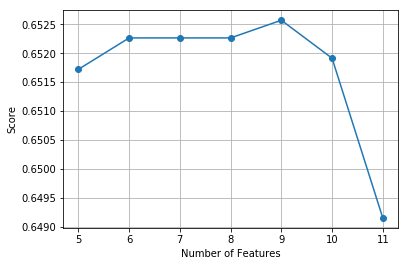

Run time: variable_selection.VarSelection.variable_selection.best_subsets ran in 6.51 sec


In [16]:
lr = linear_model.LogisticRegression(penalty = 'l1', C=0.5)
best_features = var_selection.best_subsets(lr,
                                            5, 
                                          ['age','marital_status', 'capital_gain','capital_loss', 'hours_per_week'])

In [17]:
best_features

Index(['marital_status_ Divorced', 'marital_status_ Married_civ_spouse',
       'marital_status_ Married_spouse_absent',
       'marital_status_ Never_married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

### Unit tests

In [18]:
# Unit tests to check your solution

import unittest

class TestVarSelectionClass(unittest.TestCase):
    def setUp(self):
        self.var_selection = vs.variable_selection(adult_df, 'target', k_features = 10, random_state = 1)
        
    def test_squared_corr(self): 
        result = self.var_selection.squared_corr()
        self.assertEqual(result.iloc[0,0], 'education_num', 'incorrect feature')
        self.assertEqual(np.round(result.iloc[0,1],2), 0.11, 'incorrect correlation')
                
tests = TestVarSelectionClass()

tests_loaded = unittest.TestLoader().loadTestsFromModule(tests)

unittest.TextTestRunner().run(tests_loaded)

.

Run time: variable_selection.VarSelection.variable_selection.squared_corr ran in 72 ms



----------------------------------------------------------------------
Ran 1 test in 0.076s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>